<a href="https://colab.research.google.com/github/Vokturz/Curso-Python-BCCh/blob/main/clase5/Clase5_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualización

La visualización es una parte esencial de cualquier análisis de datos, ya que facilita la comprensión de complejas estructuras de datos y resalta patrones, tendencias y anomalías en los datos. En sí, la visualización nos permite

1. Una comprensión rápida de los datos
2. Descubrimiento de patrones
3. Tomar mejores decisiones

La librería más común para la visualización de datos es [**Matplotlib**](https://matplotlib.org/). Adicionalmente, miraremos la librería [**Seaborn**](https://seaborn.pydata.org/), que está basada en Matplotlib y proporciona una interfaz de alto nivel para la creación de gráficos más atractivos.

## Matplotlib

![](https://matplotlib.org/stable/_images/sphx_glr_scatter_demo2_001.png)
> *Ejemplo de un gráfico realizado con matplotlib*

Matplotlib es la librería más usada en cuanto visualización. Tiene una enorme versatilidad, permitiendole al usuario crear desde histogramas y diagramas de dispersión hasta gráficos tridimensionales. Para importar el módulo que permite realizar gráficos debemos importar `pyplot` desde `matplotlib`, la forma más usual de hacer esto es:
```python
import matplotlib.pyplot as plt
```

Algunos de los tipos de gráficos que se pueden crear con Matplotlib son:

1. `plot`: Líneas
2. `hist`: Histograma
3. `scatter`: Dispersión
4. `bar` y `barh`: Barras (y barras horizontales)
5. `pie`: Torta
6. `boxplot`: Diagramas de caja
7. `errorbar`: Gráficos de error
8. `imshow`: Imágenes

Pueden visitar la [documentación de Matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html#adding-data-to-the-plot) para más información.

Adicionalmente a crear un gráfico, podemos personalizarlo modificando la escala del gráfico (por ejemplo, pasar a escala logarítmica uno de los ejes), cambiar las etiquetas de los ejes, agregar un título, una leyenda, etc.



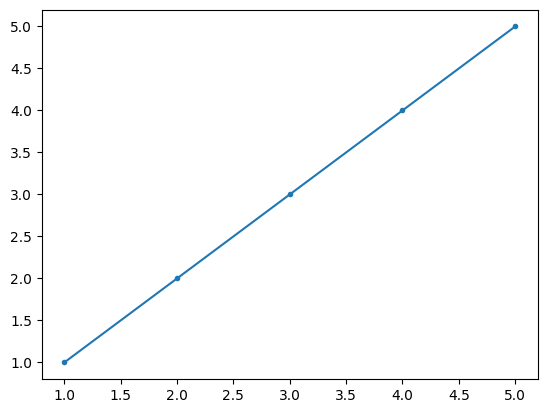

In [17]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [1,2,3,4,5]

plt.plot(x, y, marker='.') # gráfico de línea con marcadores
plt.show() # mostramos el gráfico

In [18]:
import numpy as np

# generamos 1000 elementos con media 0 y std 1
x = np.random.normal(0, 1,  1000)
# generamos 1000 elementos con media 1 y std 1
y = np.random.normal(1, 1,  1000)

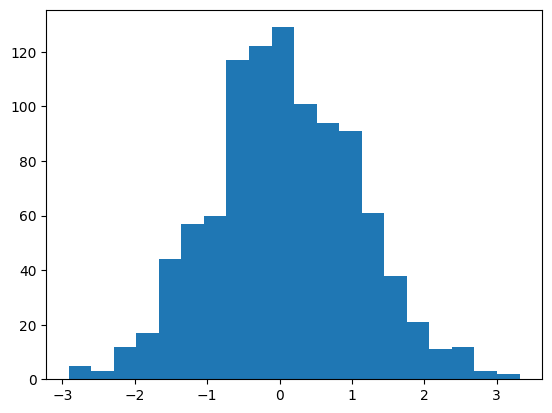

In [19]:
plt.hist(x, bins=20)
plt.show()

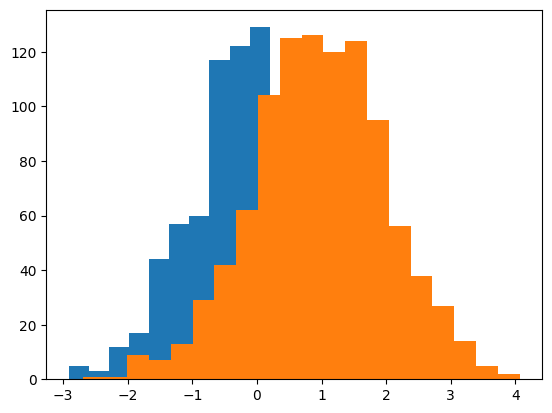

In [20]:
# Matplotlib genera un nuevo color por cada elemento agregado al gráfico
plt.hist(x, bins=20)
plt.hist(y, bins=20)
plt.show()

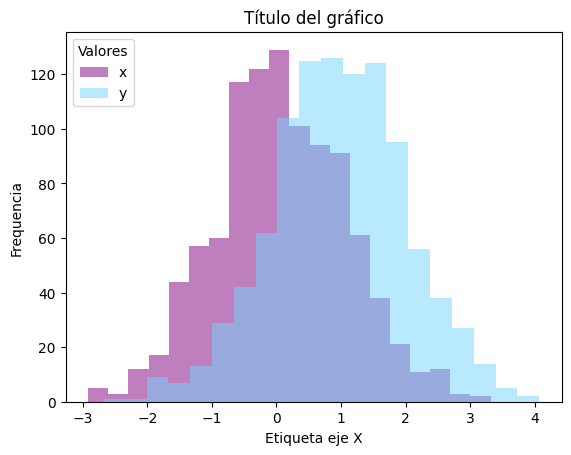

In [21]:
# Podemos embellecer un poco nuestros histogramas
plt.hist(x, bins=20,
         alpha=0.5, # alpha agrega opacidad
         label="x", # una etiqueta para la leyenda
         color="purple") # Nosotros mismos elegimos el color

# El color puede ser un nombre, así como un código hexadecimal
plt.hist(y, bins=20, alpha=0.5, label="y", color="#74d5ff")

plt.legend(loc="upper left", # Leyenda ubicada en la esquina superior izquierda
           title="Valores") # Título para la leyenda
plt.title("Título del gráfico")
plt.xlabel("Etiqueta eje X")
plt.ylabel("Frequencia")
plt.show()

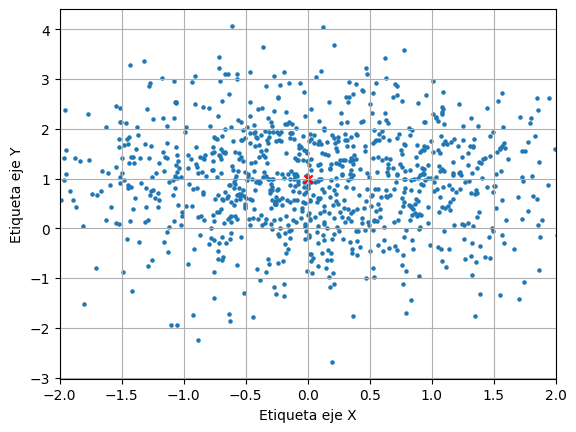

In [22]:
plt.scatter(x, y, s=5)
# sabemos que el punto 0,1 debería ser el centro
plt.scatter(0, 1, marker="x", color="red")

plt.grid() # agregamos una grilla
plt.xlim([-2, 2]) # modificamos los límites del eje x
plt.xlabel("Etiqueta eje X")
plt.ylabel("Etiqueta eje Y")
plt.show()

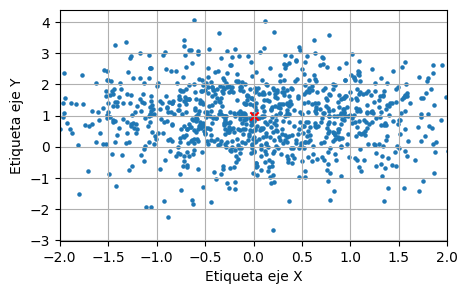

In [23]:
# Podemos  modificar el tamaño
fig, ax = plt.subplots(figsize=(5,3))
plt.scatter(x, y, s=5)
plt.scatter(0, 1, marker="x", color="red")
plt.grid()
plt.xlim([-2, 2])
plt.xlabel("Etiqueta eje X")
plt.ylabel("Etiqueta eje Y")
plt.show()

<class 'matplotlib.axes._axes.Axes'>


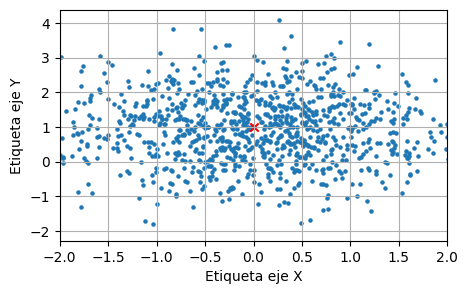

In [7]:
# Similar, pero usando el elemento ax (del tipo axes)
fig, ax = plt.subplots(figsize=(5,3))
print(type(ax))
ax.scatter(x, y, s=5)
ax.scatter(0, 1, marker="x", color="red")
ax.grid()
ax.set_xlim([-2, 2])
ax.set_xlabel("Etiqueta eje X")
ax.set_ylabel("Etiqueta eje Y")
plt.show()

En Matplotlib, los `axes` (ejé en inglés) representan un gráfico (o subgráfico) dentro de una figura. Básicamente, corresponde a el espacio donde se dibujan los puntos de datos. La diferencia entre usar directamente `plt.` y `ax.` está en que el último te da más control, sobre todo en figuras que se componen de más de un gráfico.

### Integración con Pandas

Pandas integra Matplotlib directamente, de forma que podemos graficar usando los nombres de las columnas. Para ejemplificar, cargaremos el conjunto de datos de la Flor Iris, uno de los primeros conjunto de datos en la literatura, y ampliamente usado para ejemplificar

<div>
<img src="https://github.com/Vokturz/Curso-Python-BCCh/blob/main/clase5/iris_dalle3.png?raw=true" width=400/>
</div>

In [8]:
import pandas as pd
df_iris = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv")
df_iris.sample(5) # Una muestra de 5 elementos

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
27,5.2,3.5,1.5,0.2,Iris-setosa


<Axes: xlabel='SepalLength', ylabel='SepalWidth'>

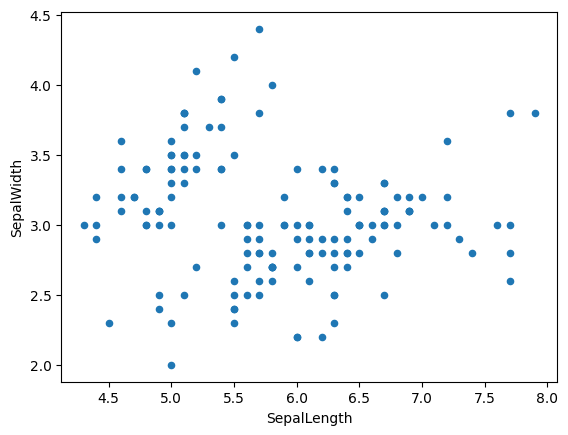

In [9]:
df_iris.plot.scatter("SepalLength", "SepalWidth")

In [10]:
print(df_iris["Name"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


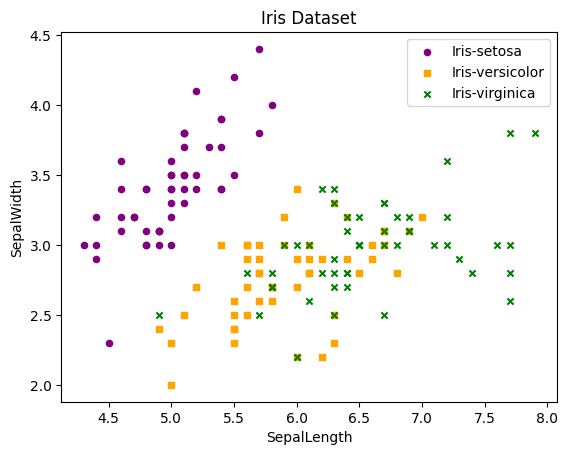

In [11]:
# Podemos agregar color según Name
# Debemos inicializar una figura, y decirle que grafique siempre en el mismo ax
fig, ax = plt.subplots() # tamaño por defecto

# Asignamos colores
colors = {"Iris-setosa": "purple",
          "Iris-versicolor" : "orange",
          "Iris-virginica" : "green"}

# Asignamos marcadores
markers = {"Iris-setosa": "o",
          "Iris-versicolor" : "s", #squares
          "Iris-virginica" : "x"}

for name in df_iris["Name"].unique(): # para cada nombre único
  df_name = df_iris[df_iris["Name"]==name]
  df_name.plot.scatter("SepalLength", "SepalWidth",
                       ax=ax, # que grafique sobre ax
                       color=colors[name], # que use el color asignado
                       marker=markers[name], # que use el marcador asignado
                       label=name) # que
ax.set_title("Iris Dataset")
ax.legend()
plt.show()

                 count   mean       std  min    25%  50%  75%  max
Name                                                              
Iris-setosa       50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
Iris-versicolor   50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
Iris-virginica    50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9


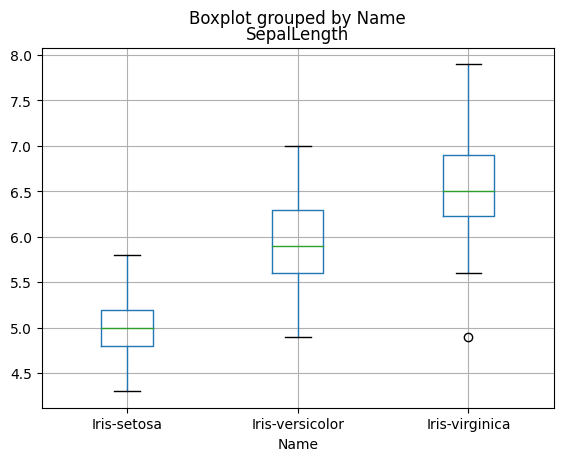

In [12]:
# Un boxplot de SepalLength según Name
print(df_iris.groupby("Name")["SepalLength"].describe())
df_iris.boxplot("SepalLength", "Name")
plt.show()

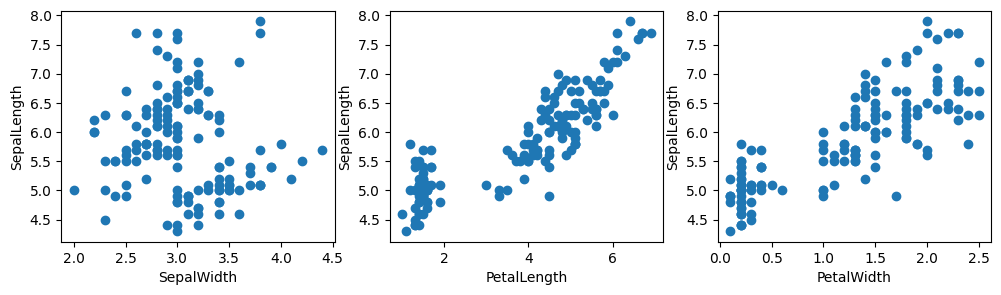

array([<Axes: xlabel='SepalWidth', ylabel='SepalLength'>,
       <Axes: xlabel='PetalLength', ylabel='SepalLength'>,
       <Axes: xlabel='PetalWidth', ylabel='SepalLength'>], dtype=object)

In [38]:
# Gráficos en un esquema 1x3
# en este caso axes es una array de dimension 3
fig, axes = plt.subplots(1, 3, figsize=(12,3))
col_y = "SepalLength"
columnas = list(df_iris.columns[:-1])
columnas.remove(col_y)
for i in range(len(columnas)):
  col_x = columnas[i]
  axes[i].scatter(df_iris[col_x], df_iris[col_y])
  axes[i].set_xlabel(col_x)
  axes[i].set_ylabel(col_y)
plt.show()
# Veamos que hay en axes
axes

y que pasa si queremos que algo así funcione para cualquier dataframe?
Podemos crear una función!

<!--
def graficar_columnas(df, col_y, lista_columnas):
  columnas = list(lista_columnas) # nos aseguramos que es una lista
  total_cols = len(columnas)
  fig, axes = plt.subplots(1, total_cols, figsize=(4*total_cols, 3))
  for i in range(total_cols):
    col_x = columnas[i]
    axes[i].scatter(df[col_x], df[col_y])
    axes[i].set_xlabel(col_x)
    axes[i].set_ylabel(col_y)
  plt.show()
-->

In [35]:
def graficar_columnas(df, col_y, lista_columnas):
  columnas = list(lista_columnas) # nos aseguramos que es una lista
  # fig, axes = plt.subplots(1, ...
  #

# Esto debería dar el mismo grafico anterior
graficar_columnas(df_iris, "SepalLength", ["SepalWidth", "PetalLength", "PetalWidth"])

## Seaborn

Librería basada en Matplotlib que proporciona una interfaz de alto nivel para crear gráficos atractivos. De Seaborn podemos destacar que
1. Es estéticamente agradable. Viene con estilos predefinidos que sonvisualmente atractivos.
2. Facilita la realización de gráficos complejos (como por ejemplo asignar colores a un gráfico de dispersión).
3. Tiene integración con Pandas!

La importación de Seaborn se hace típicamente con:
```python
import seaborn as sns
```

Dentro de su página web podemos encontrar una [galería de ejemplo](https://seaborn.pydata.org/examples/index.html), así como la [documentación](https://seaborn.pydata.org/api.html) de cada uno de los métodos.

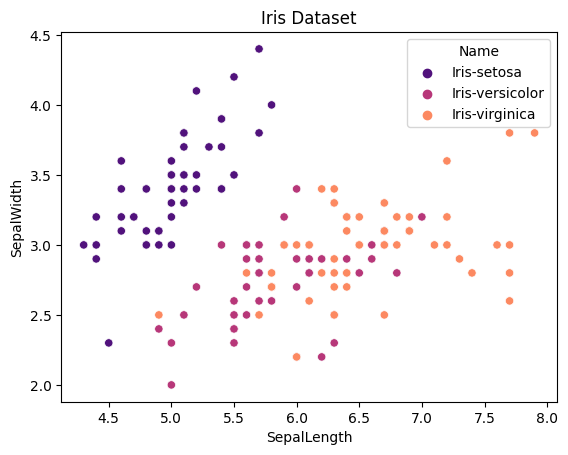

In [50]:
import seaborn as sns

# El mismo gráfico de dispersion con colores, pero con seaborn
ax = sns.scatterplot(data=df_iris, x="SepalLength", y="SepalWidth", hue="Name",
                     palette="magma") # Podemos definir una paleta de colores
ax.set_title("Iris Dataset")
plt.show()

La paletas de colores puede ser un [mapa de colores de Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html), así como una [paleta definida con Seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html).

*Nota: En Matplotlib (y en Pandas DataFrame.plot), este campo se llama `cmap`*

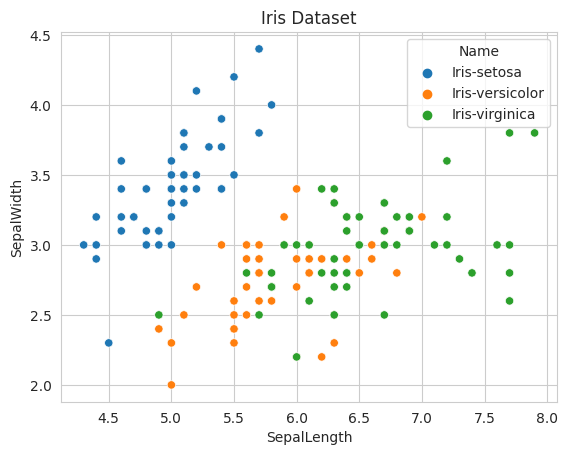

In [57]:
# Podemos setear un estilo
sns.set_style("whitegrid")
ax = sns.scatterplot(data=df_iris, x="SepalLength", y="SepalWidth", hue="Name")
ax.set_title("Iris Dataset")
plt.show()

                 count   mean       std  min    25%  50%    75%  max
Name                                                                
Iris-setosa       50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
Iris-versicolor   50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
Iris-virginica    50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8


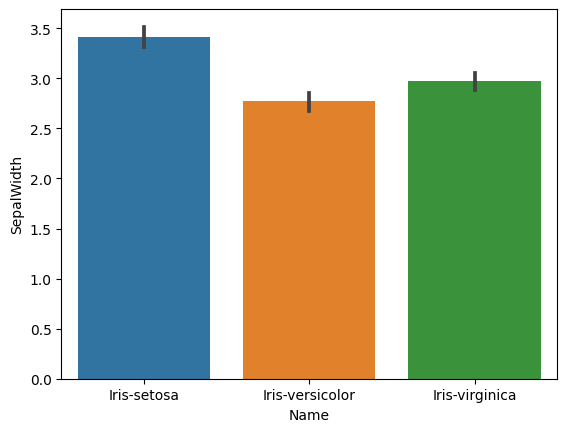

In [78]:
sns.reset_defaults() # Volvemos al estilo por defecto

print(df_iris.groupby("Name")["SepalWidth"].describe())

# Dado que hay varios valores de SepalWidth, por defecto graficará el promedio
# Junto a un intervalo de confianza del 95%
ax = sns.barplot(data=df_iris, x="Name", y="SepalWidth")
plt.show()

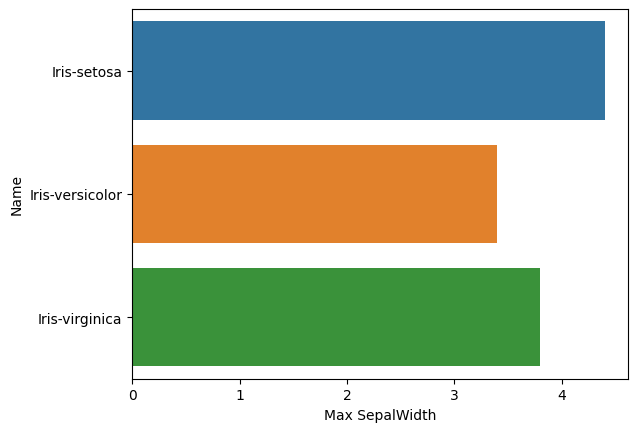

In [76]:
# Podemos modificarlo un tanto
ax = sns.barplot(data=df_iris, y="Name", x="SepalWidth",
                 orient="h", # Orientacion horizontal, cambiamos y por x
                 estimator="max", # Que grafique el valor máximo
                 errorbar=None) # Sin barras de error
ax.set_xlabel("Max SepalWidth")
plt.show()

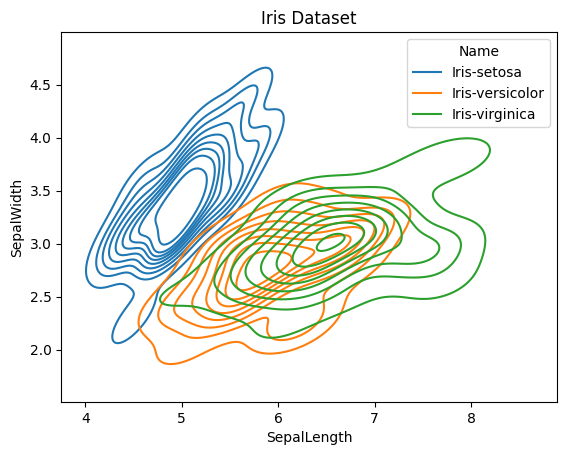

In [79]:
# Gráfico de densidad
ax = sns.kdeplot(data=df_iris, x="SepalLength", y="SepalWidth", hue="Name")
ax.set_title("Iris Dataset")
plt.show()

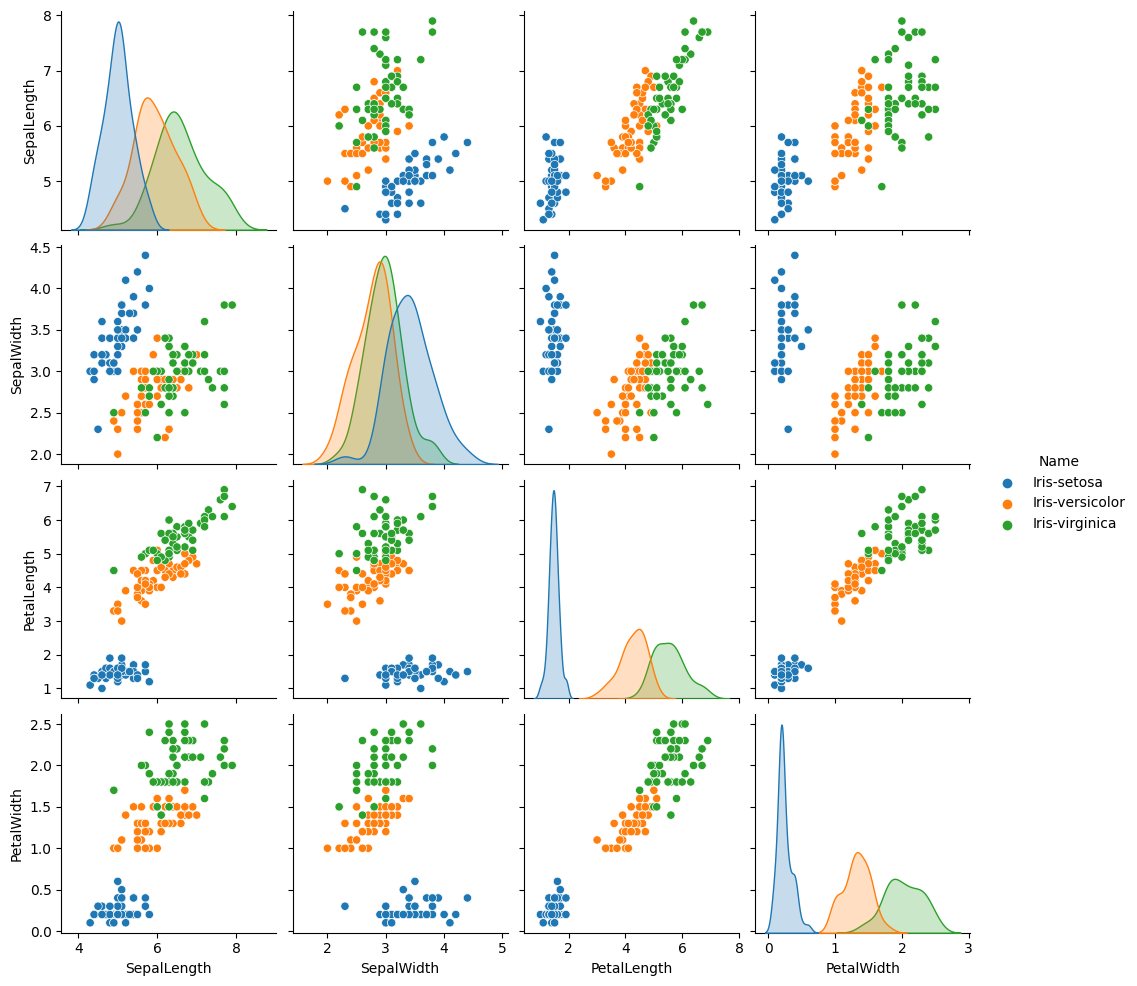

In [93]:
# Graficar las relaciones entre todas la columnas, usando una como color
sns.pairplot(df_iris, hue="Name")
plt.show()